In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Read the data
df = pd.read_csv('/content/drive/My Drive/ColabCode/30016/cleaned_file.csv')

# Remove missing values and blank strings
df = df.dropna(subset=['Email Text', 'Email Type'])
df = df[df['Email Text'].str.strip().astype(bool)]

# TF-IDF vectorization
'''
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=300, stop_words='english'):

It creates a TF-IDF feature extractor using the TfidfVectorizer class. TF-IDF is a statistical method used to measure the importance of words in a text, considering both their frequency in a document and their frequency across a corpus.
The max_df parameter is set to 0.90, which means that words appearing in more than 90% of the documents will be ignored, helping filter out common and less informative words.
The min_df parameter is set to 2, indicating that words must appear in at least 2 documents to be included, which filters out low-frequency words.
The max_features parameter is set to 300, limiting the number of features to the top 300 most important words.
The stop_words parameter is set to 'english', automatically removing common English stopwords like "the," "and," "is," etc., during the feature extraction process.
'''
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=300, stop_words='english')


In [ ]:

tfidf_matrix = vectorizer.fit_transform(df['Email Text'])
print(tfidf_matrix)

non_zero_count = tfidf_matrix.nnz
print("Number of non-zero elements: ", non_zero_count)

  (0, 123)	0.2283943529250231
  (0, 276)	0.24406408875584842
  (0, 178)	0.5820772137438657
  (0, 285)	0.21731750850631887
  (0, 152)	0.5325976988209757
  (0, 257)	0.2557632966406448
  (0, 275)	0.39134739704082894
  (1, 263)	0.28056153447386306
  (1, 213)	0.27977872492988415
  (1, 289)	0.6341748062977054
  (1, 261)	0.6639513577872609
  (2, 264)	0.06680501419068742
  (2, 143)	0.0613737224163695
  (2, 148)	0.0721603480506957
  (2, 214)	0.07690428280196841
  (2, 112)	0.08394055237256032
  (2, 16)	0.11018118657422675
  (2, 140)	0.09415074410023809
  (2, 267)	0.05611315889505115
  (2, 3)	0.06094459271335484
  (2, 92)	0.07040953046602252
  (2, 284)	0.06916541566678373
  (2, 162)	0.0789879638452927
  (2, 255)	0.1195314601760117
  (2, 59)	0.15182185495260836
  :	:
  (18626, 192)	0.14175942504681477
  (18626, 129)	0.14533558662402438
  (18626, 253)	0.16583115868100337
  (18626, 226)	0.12994206805084302
  (18626, 85)	0.14138274502925835
  (18626, 139)	0.41993710062237616
  (18626, 171)	0.13862700

In [ ]:
dense_matrix = tfidf_matrix.toarray()
print(dense_matrix)
num_columns = dense_matrix.shape[1]
print("列数：", num_columns)
num_rows = dense_matrix.shape[0]
print("行数：", num_rows)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
列数： 300
行数： 18629


In this example, TF-IDF values are floating-point numbers, such as 0.2283943529250231. Higher TF-IDF values indicate that the term is more important in a specific document. Therefore, TF-IDF values are used to measure the importance of terms in text data and can be used to rank terms, determining the top-ranked features (terms).

In [ ]:
feature_names = vectorizer.get_feature_names_out()

# print the feature name
print(feature_names)

['00' '000' '01' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19'
 '1995' '1998' '1999' '20' '2000' '2001' '2002' '21' '24' '25' '27' '30'
 '31' '3d' '40' '45' '50' '95' '98' '99' 'able' 'abstracts' 'ac' 'access'
 'account' 'acquisition' 'address' 'addresses' 'american' 'analysis'
 'august' 'available' 'bank' 'based' 'best' 'better' 'billion' 'book'
 'box' 'business' 'buy' 'california' 'card' 'case' 'cash' 'cc' 'cd'
 'change' 'check' 'click' 'com' 'come' 'committee' 'companies' 'company'
 'computer' 'conference' 'contact' 'copy' 'corp' 'cost' 'course' 'credit'
 'current' 'data' 'date' 'david' 'day' 'days' 'deal' 'department'
 'details' 'development' 'did' 'different' 'discourse' 'discussion' 'does'
 'don' 'easy' 'ect' 'edu' 'email' 'end' 'energy' 'english' 'enron' 'et'
 'example' 'experience' 'fact' 'family' 'fax' 'file' 'financial'
 'following' 'font' 'form' 'forward' 'free' 'future' 'gas' 'general'
 'given' 'going' 'good' 'grammar' 'great' 'group' 'help' 'high' 'home'
 'hou' '

In [ ]:
import numpy as np

# Calculate the average TF-IDF values for each term (feature)
average_tfidf_values = np.mean(tfidf_matrix, axis=0)

# Get the indices that would sort the terms by average TF-IDF values in descending order
sorted_indices = np.argsort(average_tfidf_values)[0, ::-1]

# Print terms and their corresponding TF-IDF values in descending order
for index in sorted_indices:
    term = vectorizer.get_feature_names_out()[index]
    tfidf_value = average_tfidf_values[0, index]
    print(f"Term: {term}, TF-IDF Value: {tfidf_value}")


Term: [['com' 'enron' 'list' 'email' 'new' 'http' 'like' 'just' 'time' 'free'
  'click' 'mail' '2002' 'information' 'linux' 'date' '00' 'ect' 'net'
  'know' '10' 'message' 'subject' 'need' 'thanks' 'use' '000' 'www'
  'want' 'don' 'business' 'make' 'people' 'language' 'best' '2001'
  'online' 'company' '01' 'mailing' 'university' 'software' '2000' 'work'
  'money' '30' 'day' 've' 'wrote' 'group' 'way' 'good' 'sent' '20'
  'order' 'home' 'let' '12' 'site' 'users' 'file' 'address' 'today'
  'send' 'pm' '11' 'll' 'think' 'help' 'start' 'phone' 'available'
  'vince' 'gas' 'save' 'world' 'web' 'contact' 'price' 'check' 'number'
  'offer' 'does' 'original' '15' 'said' 'linguistics' 'hou' 'look' 'week'
  'year' 'deal' 'link' 'report' 'fax' 'right' 'great' 'cc' 'following'
  'life' 'visit' 'credit' 'questions' 'data' '50' 'internet' '100'
  'prices' 'program' 'research' 'energy' 'remove' 'conference' 'future'
  'using' 'thank' 'power' 'years' 'form' 'looking' 'receive' 'line'
  'change' 'real'

In a TF-IDF matrix, column sorting is typically based on the average TF-IDF values of each term (across all documents), from high to low. This means that columns at the top of the ranking correspond to terms that are more important across the entire document collection. In your case, the top 300 columns correspond to the most important terms or features."

In [ ]:
# DT training and test
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X = tfidf_matrix.toarray()  # feature matrix
label_map = {'Phishing Email': 0, 'Safe Email': 1}
y = df['Email Type'].map(label_map).values  # target tag

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have your training and test sets
print("Training Set (X_train, y_train):")
print(X_train)
print(y_train)

print("\nTest Set (X_test, y_test):")
print(X_test)
print(y_test)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# The number of samples in each class in the prediction result is counted
num_phishing = sum(y_pred == 0)  # 统计 "Phishing" 预测数量
num_safe = sum(y_pred == 1)      # 统计 "Safe" 预测数量

print(f"Phishing 预测数量：{num_phishing}")

print(f"Safe 预测数量：{num_safe}")


Training Set (X_train, y_train):
[[0.17484322 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.22792663 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.19389517]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1 1 1 ... 1 0 0]

Test Set (X_test, y_test):
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.44780999 0.         0.50659656 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 1 1 ... 0 1 1]
              p

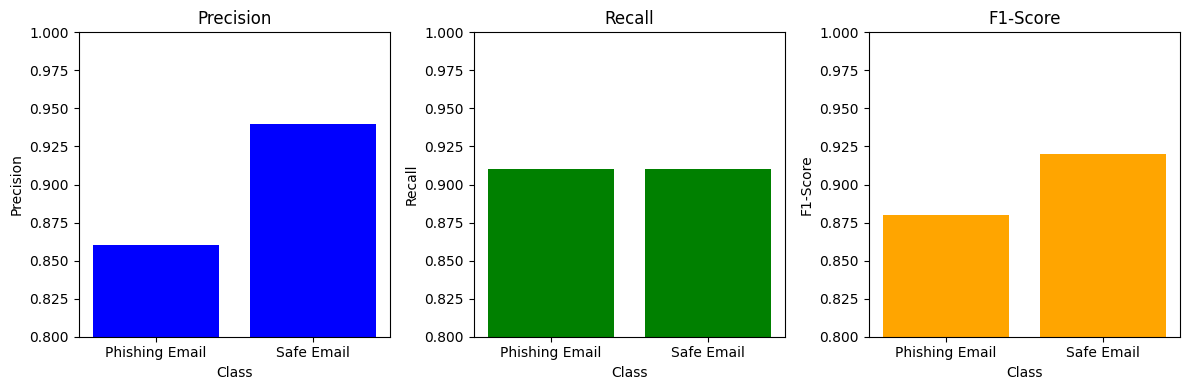

In [2]:
import matplotlib.pyplot as plt

# 提取 precision、recall、f1-score 和类别标签
class_labels = ['Phishing Email', 'Safe Email']
precision = [0.86, 0.94]
recall = [0.91, 0.91]
f1_score = [0.88, 0.92]

# 创建三个独立的柱状图
plt.figure(figsize=(12, 4))

# Precision 柱状图histogram
plt.subplot(131)
plt.bar(class_labels, precision, color='blue')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision')
plt.ylim(0.8, 1)

# Recall 柱状图
plt.subplot(132)
plt.bar(class_labels, recall, color='green')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall')
plt.ylim(0.8, 1)

# F1-Score 柱状图
plt.subplot(133)
plt.bar(class_labels, f1_score, color='orange')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score')
plt.ylim(0.8, 1)

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = tfidf_matrix.toarray()  # 特征矩阵
label_map = {'Phishing Email': 0, 'Safe Email': 1}
y = df['Email Type'].map(label_map).values  # 目标标签

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Using the random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1428
           1       0.96      0.94      0.95      2298

    accuracy                           0.94      3726
   macro avg       0.94      0.94      0.94      3726
weighted avg       0.94      0.94      0.94      3726



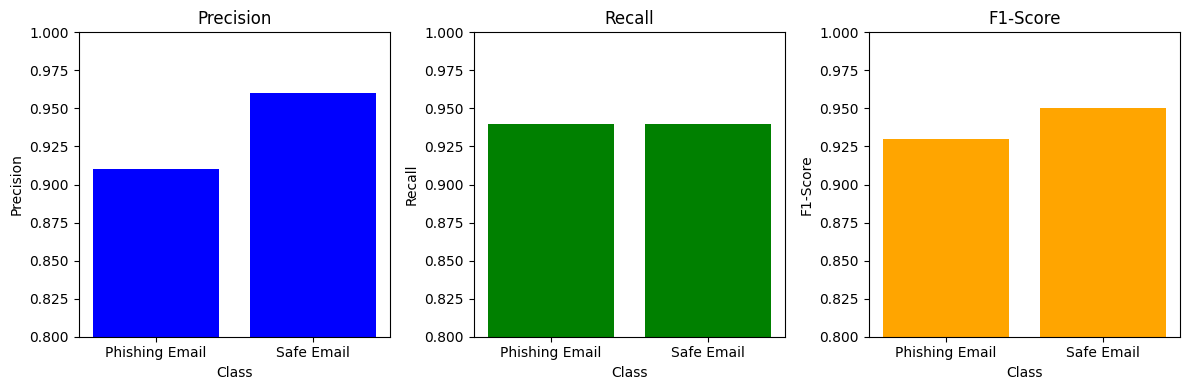

In [1]:
import matplotlib.pyplot as plt

# 提取 precision、recall、f1-score 和类别标签
class_labels = ['Phishing Email', 'Safe Email']
precision = [0.91, 0.96]
recall = [0.94, 0.94]
f1_score = [0.93, 0.95]

# 创建三个独立的柱状图
plt.figure(figsize=(12, 4))

# Precision 柱状图
plt.subplot(131)
plt.bar(class_labels, precision, color='blue')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision')
plt.ylim(0.8, 1)

# Recall 柱状图
plt.subplot(132)
plt.bar(class_labels, recall, color='green')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall')
plt.ylim(0.8, 1)

# F1-Score 柱状图
plt.subplot(133)
plt.bar(class_labels, f1_score, color='orange')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score')
plt.ylim(0.8, 1)

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

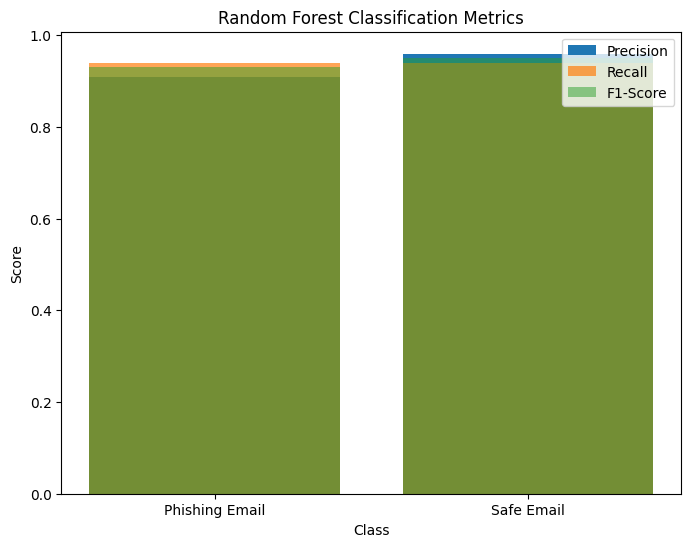

In [ ]:
import matplotlib.pyplot as plt

# 提取 precision、recall、f1-score 和类别标签
class_labels = ['Phishing Email', 'Safe Email']
precision = [0.91, 0.96]
recall = [0.94, 0.94]
f1_score = [0.93, 0.95]

# 创建柱状图
plt.figure(figsize=(8, 6))
plt.bar(class_labels, precision, label='Precision')
plt.bar(class_labels, recall, label='Recall', alpha=0.7)
plt.bar(class_labels, f1_score, label='F1-Score', alpha=0.5)

# 添加标签和图例
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Random Forest Classification Metrics')
plt.legend()

# 显示图像
plt.show()

In [ ]:
# Split the data into training and test sets
X = tfidf_matrix.toarray()
label_map = {'Phishing Email': 0, 'Safe Email': 1}
y = df['Email Type'].map(label_map).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the XGBoost classifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Generate categorized reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1428
           1       0.97      0.93      0.95      2298

    accuracy                           0.94      3726
   macro avg       0.93      0.94      0.94      3726
weighted avg       0.94      0.94      0.94      3726

